In [2]:
import sys
sys.path.insert(0, '/home/work/Simulation/G2/G2Ana/SRKAnalysis')
import srkglobal
import srkplotting as spl
import numpy as np
from scipy.optimize import curve_fit

Welcome to JupyROOT 6.12/06


In [3]:
srkglobal.set_computer("home_laptop")
srkglobal.set_graphs_dir('/home/work/Simulation/G2Out/graphs/')
bid = 81
#base_phi = spl.make_tree_to_array(bid)[4]
#base_theta = spl.make_tree_to_array(bid)[5]
#baseB = spl.make_tree_to_array(bid)[6:]
#print baseB
#time_arr = spl.make_timeline(bid)

tree = spl.make_tree_to_array(bid)
#corresponds to [Bquad, Bsext, Bboth], within: [posx, posz, velx, velz, phi, theta, Bx, By, Bz]

In [2]:
def cosinus(t, A, w):
    return A*np.cos(w*t)
theo = 1.6021766208e-19*0.00116592091*1.4513/1.883531594e-28

def w_a(MdotV, time_arr):
    pars, covs = curve_fit(cosinus, time_arr, MdotV, [1, theo])
    return (pars[1], covs[1,1])

def ppb(MdotV, time_arr):
    wa = w_a(MdotV, time_arr)[0]
    return (wa-theo)/theo

In [11]:
##Radial E field correction
E = [4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 3.7, 3.7, 3.7, 3.7, 3.7, 4.8, 4.8] #change this to get from sql database
B = 1.4513
R0 = 7.112
chargeToMassRatio = 1.6021766208e-19 / 1.883531594e-28

for i in range(14):
    Eid = 30+i
    print Eid
    MdotV = spl.make_tree_to_array(Eid)[10]
    time_arr = spl.make_timeline(Eid)
    sim = ppb(MdotV, time_arr)
    
    k=2*E[i]*1e6
    vx = spl.make_tree_to_array(Eid)[3]
    vz = spl.make_tree_to_array(Eid)[5]
    vxz = np.sqrt(vx**2 + vz**2)
    beta=vxz.mean()/299792458.
    gamma = 1/np.sqrt(1 - beta**2)
    n = k*R0/(vxz.mean()*B)
    r = gamma*vxz.mean()/(chargeToMassRatio*1.4513)
    C_E = -2*n*(1-n)*beta**2 *(r-7.112)**2/(R0**2)
    
    print "Simulated "+str(sim)+" vs. calculated "+str(C_E)
    print "Ratio: "+str(sim/C_E)

30
Simulated -1.21716161089e-11 vs. calculated -9.51449436721e-12
Ratio: 1.27927093539
31
Simulated -1.49809184629e-06 vs. calculated -1.06328166877e-06
Ratio: 1.40893226159
32
Simulated -1.47855800032e-06 vs. calculated -1.05200220076e-06
Ratio: 1.40547044412
33
Simulated -9.34369411986e-06 vs. calculated -6.61514891181e-06
Ratio: 1.41246920431
34
Simulated -9.2613235964e-06 vs. calculated -6.60540289893e-06
Ratio: 1.40208307322
35
Simulated 0.000218804599129 vs. calculated -1.05223508475e-06
Ratio: -207.942694841
36
Simulated 0.0003382065807 vs. calculated -6.60685099208e-06
Ratio: -51.1902843133
37
Simulated -9.01790514644e-12 vs. calculated -7.64714667604e-12
Ratio: 1.17925097144
38
Simulated -1.10807263431e-06 vs. calculated -8.54764596683e-07
Ratio: 1.29634830292
39
Simulated -1.09256558548e-06 vs. calculated -8.45371480281e-07
Ratio: 1.29240885335
40
Simulated -6.91547800711e-06 vs. calculated -5.31939768304e-06
Ratio: 1.30004906931
41
Simulated -6.83815203894e-06 vs. calculated

In [3]:
vx = tree[3]
vy = tree[4]
vz = tree[5]

/usr/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


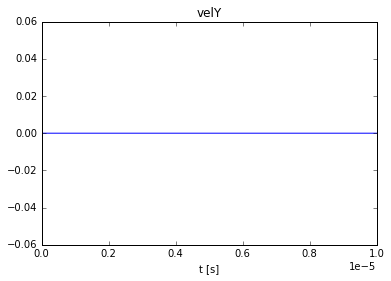

In [4]:
spl.plot_single('velY', vy, time_arr, 'show')

In [13]:
vy.max()

167466.68703279278

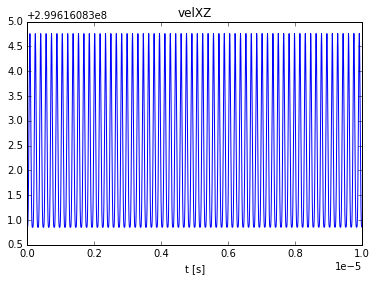

299616085.31447572

In [10]:
vxz = np.sqrt(vx**2 + vz**2)
spl.plot_single('velXZ', vxz, time_arr, 'show')
vxz.mean()

In [27]:
r = gamma*vxz.mean()/(chargeToMassRatio*1.4513)
r

7.0764268894903113

In [11]:
Av = (vxz.max()-vxz.min())/2

In [26]:
psi0 = np.arctan(vy.max()/vxz.min())
C_P = psi0**2/4
C_P

7.8101894582793548e-08

In [28]:
k=2*4.8e6
beta=vxz.mean()/299792458.
B = 1.4513
R0 = 7.112
n = k*R0/(vxz.mean()*B)
chargeToMassRatio = 1.6021766208e-19 / 1.883531594e-28
gamma = 1/np.sqrt(1 - beta**2)
xe2 = gamma**2*(vxz.mean()**2 + Av**2/2)/(chargeToMassRatio**2*B**2) - 2*R0*gamma*vxz.mean()/(chargeToMassRatio*B) + R0**2
#C_E = -2*k*(vxz.mean()*B - k*R0)*xe2/(R0*B**2*299792458.**2)
#C_E = -2*n*(1-n)*beta**2 *xe2/(R0**2)
C_E = -2*n*(1-n)*beta**2 *(r-7.112)**2/(R0**2)
#-2*0.157*(1-0.157)*0.9994**2*1e-4/R0**2
C_E

-6.6151489118056931e-06

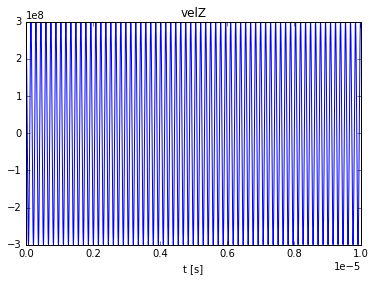

In [134]:
spl.plot_single('velZ', vz, time_arr, 'show')

In [24]:
x = tree[0]
z = tree[2]

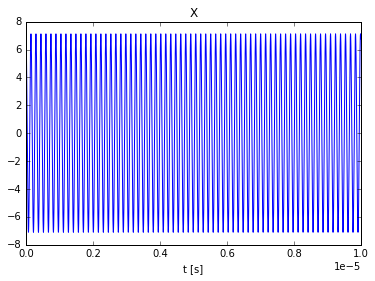

In [6]:
spl.plot_single('X', x, time_arr, 'show')

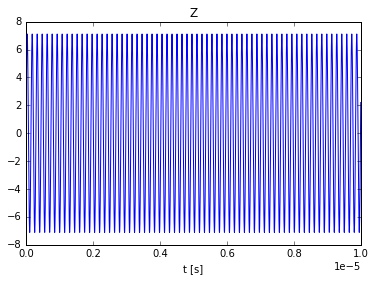

In [137]:
spl.plot_single('Z', z, time_arr, 'show')

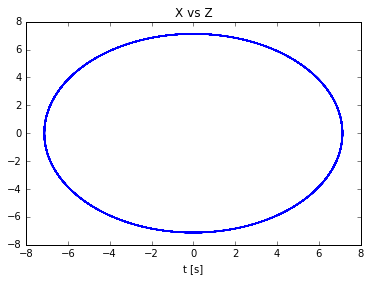

In [61]:
spl.plot_single('X vs Z', x, z, 'show')

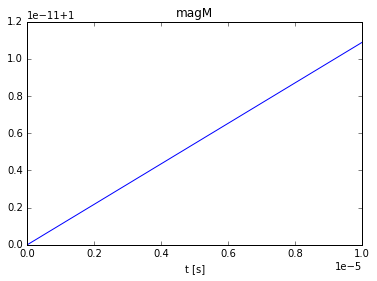

In [16]:
magM = tree[9]
spl.plot_single('magM', magM, time_arr, 'show')

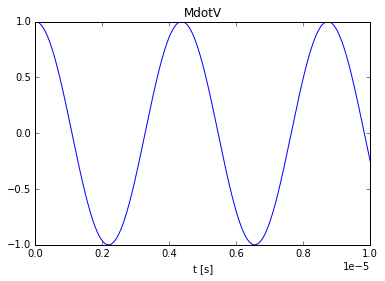

In [17]:
MdotV = tree[10]
spl.plot_single('MdotV', MdotV, time_arr, 'show')

In [18]:
def cosinus(t, A, w):
    return A*np.cos(w*t)
theo = 1.6021766208e-19*0.00116592091*1.4513/1.883531594e-28

In [19]:
pars, covs = curve_fit(cosinus, time_arr, MdotV, [1, theo])
print pars, covs

[  9.99999999e-01   1.43932779e+06] [[  6.19296673e-18   5.21136592e-14]
 [  5.21136592e-14   1.72706927e-07]]


In [20]:
pars[1]-theo

-13.44876422546804

In [21]:
(pars[1]-theo)/theo

-9.3436941198598345e-06

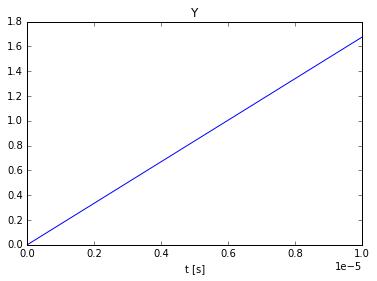

In [6]:
y = tree[1]
spl.plot_single('Y', y, time_arr, 'show')

In [10]:
beta_y = 1.5592e7
ypars, ycovs = curve_fit(cosinus, time_arr, y, [0.01, beta_y])
print ypars, ycovs

[ -9.39041573e-04   1.56843282e+07] [[  9.93772479e-09   9.05718421e-03]
 [  9.05718421e-03   3.36221152e+08]]


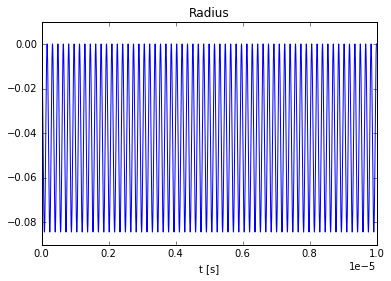

In [25]:
r = np.sqrt(x**2 + z**2) - 7.112
spl.plot_single('Radius', r, time_arr, 'show')

In [45]:
beta_r = 3.9134e7
rpars, rcovs = curve_fit(cosinus, time_arr, r, [0.01, beta_r])
print rpars, rcovs

[  7.08469523e-04   3.90497796e+07] [[  1.00187046e-08   1.87457051e-03]
 [  1.87457051e-03   6.01703072e+08]]


In [48]:
def lin(xdata, slope, intercept):
    return slope*xdata + intercept

def lin_zero(xdata, slope):
    return slope*xdata

In [49]:
params, cov = curve_fit(lin, time_arr, phi[:-1], [theo*g, 1.57])
print params

[  4.21749684e+07   1.57079635e+00]


In [51]:
params[0]/g

1439257.8940922038

In [50]:
print cov

[[  5.39654211e-03  -9.20110432e-10]
 [ -9.20110432e-10   2.09173304e-16]]


In [35]:
print theo*g

42177410.5506


In [ ]:
pars, covs = curve_fit(lin_zero, time_arr*29.3, abs_phi[0][1]/29.3, [0.91517056/29.3])
print pars, covs

In [38]:
fpars, fcovs = curve_fit(lin, time_arr[10000:], phi[10000:-1]/time_arr[10000:], [0, theo*g])
print fpars, fcovs

[        0.          52539694.83350918] [[ inf  inf]
 [ inf  inf]]


/usr/lib/python2.7/dist-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [ ]:
#spl.plot_comparative('Phase difference in Lab - Ax=10mm - B_sext', [abs_phi[0][1]/29.3, lin_zero(time_arr*29.3, 0.00106602)], time_arr*29.3, 'both', r'$\Delta \varphi$ [rad]', ['Simulation', 'Linear Fit, slope 0.00106602'], '.-', False)

spl.plot_comparative('Frequency difference in CF - Ax=10mm - B_sext', [abs_phi[0][1][1:]/time_arr[1:], lin(time_arr[1:], 0, 9.15171288e-01)], time_arr[1:], 'both', r"$\delta \omega'$ [rad s$^{-1}$]", ['Simulation', 'Linear Fit, offset 9.15171288e-01'], '.-')


In [ ]:
def sinus(t, A, w):
    return A*np.sin(w*t)
def sinus_dec(t, A, w):
    return (A/t)*np.sin(w*t)
#sinpars, sincovs = curve_fit(sinus, time_arr, abs_phi[0][0], [7.0773e-6, 1.1466e09])
#print sinpars, sincovs

In [ ]:
def combined_zero(t, A, w, s):
    return sinus(t, A, w) + lin_zero(t, s)
def combined(t, A, w, s, o):
    return sinus_dec(t, A, w) + lin(t, s, o)
#compars, comcovs = curve_fit(combined_zero, time_arr*29.3, abs_phi[0][0]/29.3, [7.0773e-6/29.3, 1.1466e09/29.3, 0])
#print compars, comcovs

In [ ]:
print cov
print covs

In [ ]:
old_base=spl.make_tree_to_array(17)[4]
old_total=spl.make_tree_to_array(32)
old_phi=spl.delta_phi(old_total[4], old_base, True)

In [ ]:
old_pars, old_covs = curve_fit(lin_zero, time_arr, old_phi, [12])
print old_pars, old_covs

In [ ]:
np.max(abs_phi[0][0])

In [ ]:
middle = ['Ax=10mm', 'Ay=10mm', 'Ax=Ay=10mm']
end = ['B_quad', 'B_sext', 'B_total']
for i in range(3):
    for j in range(3):
        cfphase_pars, cfphase_covs = curve_fit(combined_zero, time_arr, abs_phi[i][j], [abs_phi[i][j][-1]/23.9e-6])
        spl.plot_comparative('Phase difference in CF - '+middle[i]' - '+end[j], [abs_phi[i][j], lin_zero(time_arr, cfphase_pars[0])], time_arr, 'both', r'$\Delta \varphi$ [rad]', ['Simulation', 'Linear Fit, slope '+str(cfphase_pars[0])], '.-')
        
        lphase_pars, lphase_covs = curve_fit(lin_zero, time_arr*29.3, abs_phi[i][j]/29.3, [abs_phi[i][j][-1]/(29.3*29.3*23.9e-6)]
        spl.plot_comparative('Phase difference in Lab - '+middle[i]' - '+end[j], [abs_phi[i][j]/29.3, lin_zero(time_arr*29.3, lphase_pars[0])], time_arr*29.3, 'both', r'$\Delta \varphi$ [rad]', ['Simulation', 'Linear Fit, slope '+str(lphase_pars[0])], '.-')
        
        cgfreq_pars, cffreq_covs = curve_fit
                                             